In [57]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

print("TensorFlow version:", tf.__version__)



TensorFlow version: 2.15.0


## Simplest Neural Network with One Layer and One Node

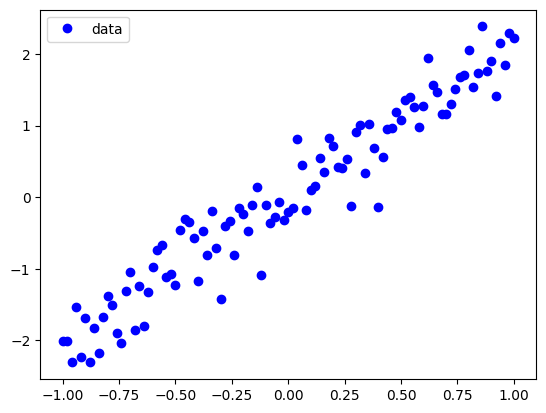

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
trX = np.linspace(-1, 1, 101)
trY = 2 * trX + np.random.randn(*trX.shape) * 0.33

plt.plot(trX, trY,'bo',label='data')
plt.legend()
plt.show()

In [59]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

In [60]:
# Print initial weights
weights = model.layers[0].get_weights()
w_init = weights[0][0][0]
b_init = weights[1][0]
print('Linear regression model is initialized with weight w: %.2f, b: %.2f' % (w_init, b_init))

Linear regression model is initialized with weight w: 0.36, b: 0.00


In [61]:
model.fit(trX, trY, epochs=50)

Epoch 1/50
4/4 [==============================] - 0s 4ms/step - loss: 1.1143
Epoch 2/50
4/4 [==============================] - 0s 4ms/step - loss: 1.0632
Epoch 3/50
4/4 [==============================] - 0s 4ms/step - loss: 1.0185
Epoch 4/50
4/4 [==============================] - 0s 5ms/step - loss: 0.9722
Epoch 5/50
4/4 [==============================] - 0s 4ms/step - loss: 0.9245
Epoch 6/50
4/4 [==============================] - 0s 4ms/step - loss: 0.8839
Epoch 7/50
4/4 [==============================] - 0s 4ms/step - loss: 0.8476
Epoch 8/50
4/4 [==============================] - 0s 5ms/step - loss: 0.8119
Epoch 9/50
4/4 [==============================] - 0s 5ms/step - loss: 0.7749
Epoch 10/50
4/4 [==============================] - 0s 4ms/step - loss: 0.7433
Epoch 11/50
4/4 [==============================] - 0s 5ms/step - loss: 0.7116
Epoch 12/50
4/4 [==============================] - 0s 9ms/step - loss: 0.6802
Epoch 13/50
4/4 [==============================] - 0s 8ms/step - loss: 0.

In [62]:
weights = model.layers[0].get_weights()
w = weights[0][0][0]
b = weights[1][0]
print('Linear regression model is trained with weight w: %.2f, b: %.2f' % (w, b))

Linear regression model is trained with weight w: 1.65, b: 0.02


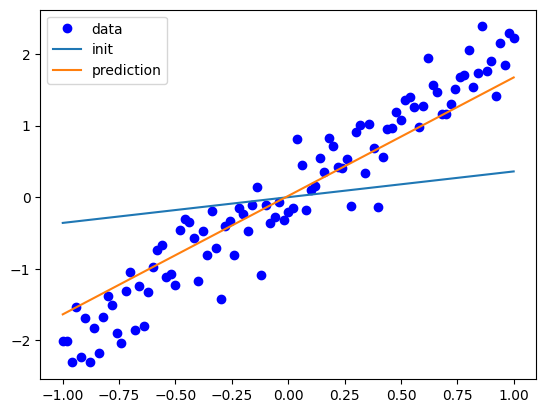

In [63]:
plt.plot(trX, trY,'bo', label='data')
plt.plot(trX, w_init*trX + b_init, label='init')
plt.plot(trX, w*trX + b, label='prediction')
plt.legend()
plt.show()

# MNIST dataset
 Quick start DNN with tf using


In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.0328828 ,  0.07718077,  0.3924834 ,  0.03558382, -0.10680958,
        -0.0690897 ,  0.47338185, -0.09752654, -0.28038833,  0.31723478]],
      dtype=float32)

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.08766539, 0.09786517, 0.13414127, 0.09387779, 0.08141834,
        0.08454808, 0.14544411, 0.08217766, 0.0684444 , 0.12441775]],
      dtype=float32)

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
loss_fn(y_train[:1], predictions).numpy()

2.470435

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3220 - accuracy: 0.9051
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1339 - accuracy: 0.9618
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0969 - accuracy: 0.9722
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0757 - accuracy: 0.9781
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0633 - accuracy: 0.9813


In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0938 - accuracy: 0.9726 - 824ms/epoch - 3ms/step


[0.09378456324338913, 0.972599983215332]

#  Fashion MNIST

It contains 70,000 items of clothing in 10 different categories. Each item of clothing is in a 28x28 greyscale image. You can see some examples here:

![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

In [65]:
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [66]:
# Get the shapes of the components
print("Training set images shape:", test_images.shape)
print("Training set labels shape:", training_images.shape)
print("Test set images shape:", test_labels.shape)
print("Test set labels shape:", training_labels.shape)

Training set images shape: (10000, 28, 28)
Training set labels shape: (60000, 28, 28)
Test set images shape: (10000,)
Test set labels shape: (60000,)


In [67]:
test_images[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 145, 190,
         97, 109, 105, 187,  76,   0,   0,   0,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  64, 170, 163, 208,
        243, 240, 229, 173, 162, 154,  18,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  39, 158, 196, 149, 191, 199,
        223, 243, 186, 191, 170, 155, 162, 126,  22,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   3,   0, 105, 161, 150, 141, 130, 199, 239,
        229, 220, 188, 244, 145, 128, 142, 151, 175,  23,   0,   2,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 150, 137, 134, 130, 147, 121, 241,
        255, 114, 240, 173, 142, 136, 132, 128, 153, 113,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  17, 157, 129, 146, 149, 137, 141, 177,
        200, 200, 207, 134, 145, 142, 140, 132, 129, 140,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  50, 158, 137, 153, 150, 125, 155, 191,
        175, 141, 165, 166, 153, 130, 129, 132, 141, 149,  18,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  77, 166, 161, 137, 151, 166, 181, 216,
        182, 158, 215, 195, 155, 159, 162, 173, 150, 150,  58,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 104, 159, 170, 140, 132, 182, 198, 208,
        175, 136, 174, 169, 147, 155, 121, 188, 162, 142, 101,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 112, 171, 206, 179, 147, 163, 177, 196,
        192, 146, 187, 153, 142, 144, 136, 245, 202, 132, 137,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 126, 181, 219, 146, 157, 128, 121, 175,
        196, 104, 157, 158, 151, 140, 103,  89, 221, 141, 153,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 157, 175, 216,  55, 175, 153, 151, 188,
        214, 126, 204, 159, 145, 145, 116,  71, 212, 154, 155,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 183, 163, 232,  64, 138, 142, 182, 195,
        200, 158, 231, 146, 130, 161, 132, 105, 225, 146, 157,  10,   0,
          0,   0],
       [  0,   0,   0,   0,   6, 188, 161, 221,  54, 149, 165, 151, 167,
        188, 170, 181, 154, 141, 130, 144,  93, 207, 166, 142,  34,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 182, 165, 236,  29, 146, 170, 141, 166,
        208, 124, 162, 173, 154, 132, 140,  97, 194, 153, 161,  47,   0,
          0,   0],
       [  0,   0,   0,   0,  58, 175, 171, 191,   5, 173, 162, 154, 181,
        207, 100, 161, 179, 155, 146, 149,  76, 192, 162, 150,  62,   0,
          0,   0],
       [  0,   0,   0,   0,  80, 179, 166, 167,  10, 182, 151, 157, 178,
        184, 166, 208, 174, 138, 146, 140,  73, 186, 161, 155,  71,   0,
          0,   0],
       [  0,   0,   0,   0, 100, 165, 171, 138,  51, 194, 157, 133, 187,
        196, 166, 198, 163, 129, 142, 134,  73, 191, 154, 155,  79,   0,
          0,   0],
       [  0,   0,   0,   0, 109, 158, 175, 118,  73, 179, 146, 149, 183,
        207, 141, 184, 171, 153, 137, 147,  73, 195, 157, 154,  85,   0,
          0,   0],
       [  0,   0,   0,   0, 109, 163, 179, 122, 116, 177, 144, 165, 182,
        190, 147, 179, 162, 146, 133, 153,  97, 161, 158, 150,  95,   0,
          0,   0],
       [  0,   0,   0,   0, 107, 158, 167, 163, 105, 137, 161, 163, 203,
        199, 149, 181, 167, 161, 147, 147,  99, 166, 157, 141,  99,   0,
          0,   0],
       [  0,   0,   0,   0, 109, 154, 166, 145,   0,  34,  84,  63, 107,
        149, 132, 153, 129, 124, 149,  56,   0, 114, 159, 141,  97,   0,
          0,   0],
       [  0,   0,   0,   0, 108, 154, 169,  85,   0,   0,   0,   0,   0,
          0,   2,   9,   0,   0,   0,   0,   0,  93, 157, 142,  99,   0,
          0,   0],
       [  0,   0,   0,   0, 101, 153, 169,  80,   0,   3,   0,   1,   0,
          0,   0,   0,   0,   0,   0,   1,   0,  80, 155, 144, 105,   0,
          0,   0],
       [  0,   0,   0,   0, 121, 157, 16

In [70]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [71]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [79]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(training_images, training_labels, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2297 - accuracy: 0.9150
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2205 - accuracy: 0.9166
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2148 - accuracy: 0.9200
Epoch 4/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2096 - accuracy: 0.9204
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2043 - accuracy: 0.9230
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1972 - accuracy: 0.9258
Epoch 7/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1923 - accuracy: 0.9276
Epoch 8/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1872 - accuracy: 0.9288
Epoch 9/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1826 - accuracy: 0.9311
Epoch 10/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1

313/313 [==============================] - 1s 2ms/step - loss: 0.5777 - accuracy: 0.8775

Test loss: 0.5777395367622375
Test accuracy: 0.8774999976158142


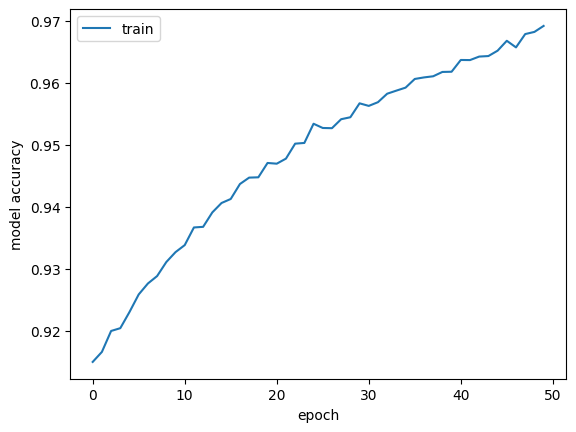

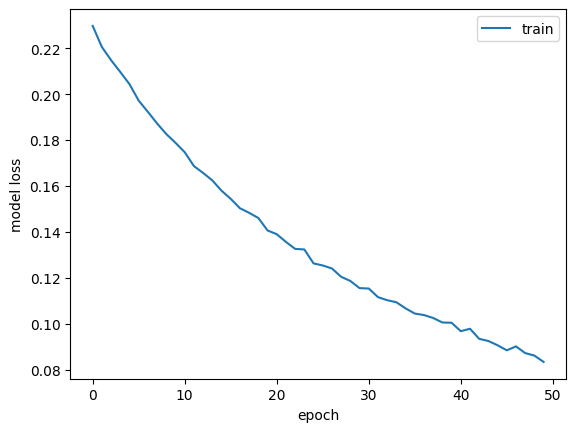

In [80]:
# evaluate model
score = model.evaluate(test_images, test_labels, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()